In [1]:
# Importing helper visualisation functions
from minihack.tiles.rendering import get_des_file_rendering

import IPython.display
def render_des_file(des_file, **kwargs):
    image = get_des_file_rendering(des_file, **kwargs)
    IPython.display.display(image)

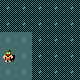

In [2]:
des_file = """
MAZE: "mylevel", ' '
FLAGS:premapped
GEOMETRY:center,center
MAP
.....
.....
.....
.....
.....
ENDMAP
"""
render_des_file(des_file, n_images=1, full_screen=False)

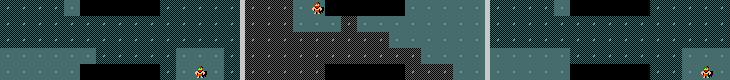

In [3]:
des_file = """
MAZE: "mylevel", ' '
FLAGS:premapped
GEOMETRY:center,center
MAP
.....     .....
...............
...............
...............
.....     .....
ENDMAP
"""
render_des_file(des_file, n_images=3)

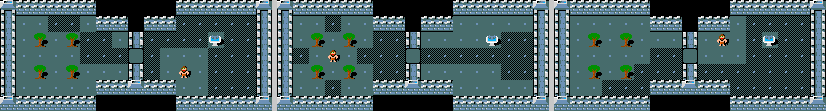

In [4]:
des_file = """
MAZE: "mylevel", ' '
FLAGS:premapped
GEOMETRY:center,center
MAP
|-----     ------
|.....-- --.....|
|.T.T...-....K..|
|.......+.......|
|.T.T...-.......|
|.....-----.....|
|-----     ------
ENDMAP
"""
render_des_file(des_file, n_images=3, full_screen=False)

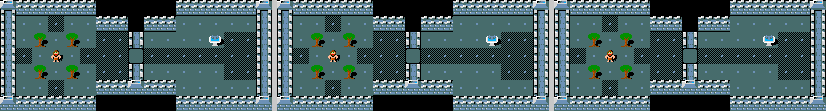

In [5]:
des_file = """
MAZE: "mylevel", ' '
FLAGS:premapped
GEOMETRY:center,center
MAP
|-----     ------
|.....-- --.....|
|.T.T...-....K..|
|.......+.......|
|.T.T...-.......|
|.....-----.....|
|-----     ------
ENDMAP
BRANCH: (3,3,3,3),(4,4,4,4)
"""
render_des_file(des_file, n_images=3, full_screen=False)

## ROOM-type levels
Let's look at a simple ROOM-type des-file:

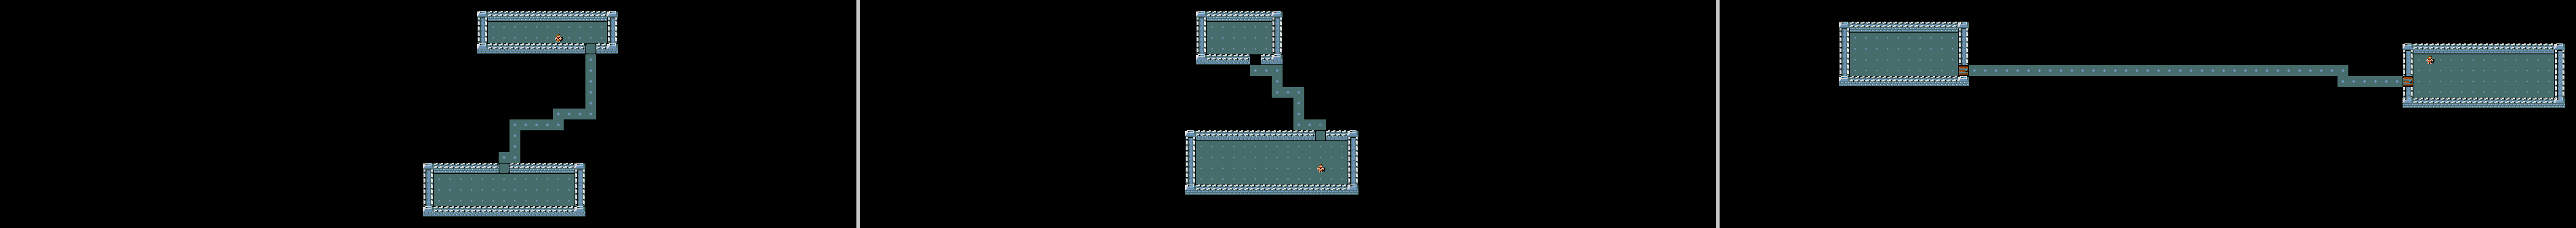

In [6]:
des_file = """
LEVEL: "mylevel"
FLAGS: premapped

ROOM: "ordinary" , lit, random, random, random {
}
ROOM: "ordinary" , lit, random, random, random {
}

RANDOM_CORRIDORS
"""
render_des_file(des_file, n_images=3, full_screen=True)

Room placed with position:  1 , 1


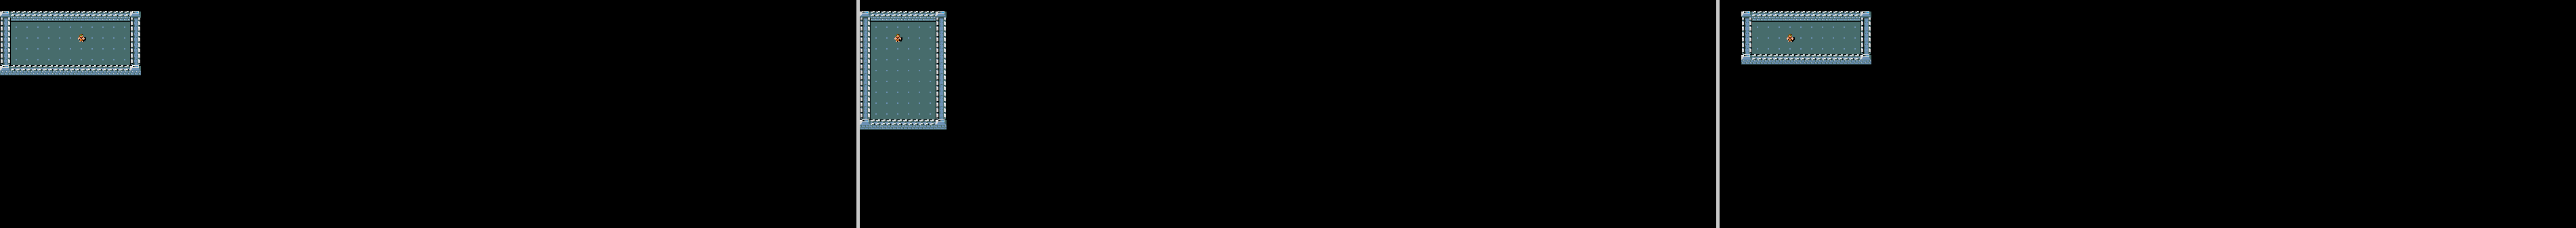

Room placed with position:  1 , 5


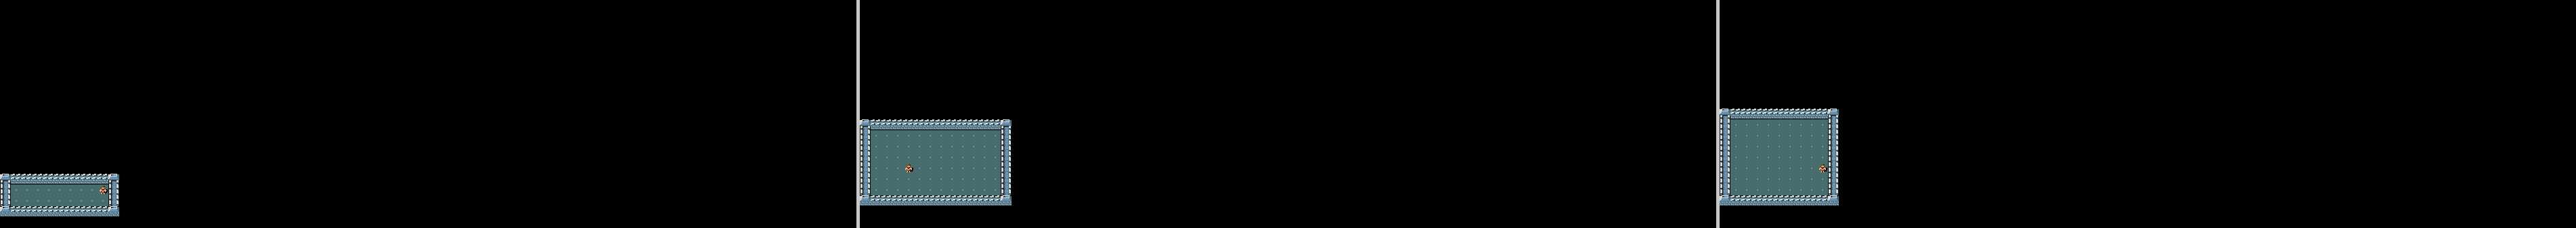

Room placed with position:  5 , 1


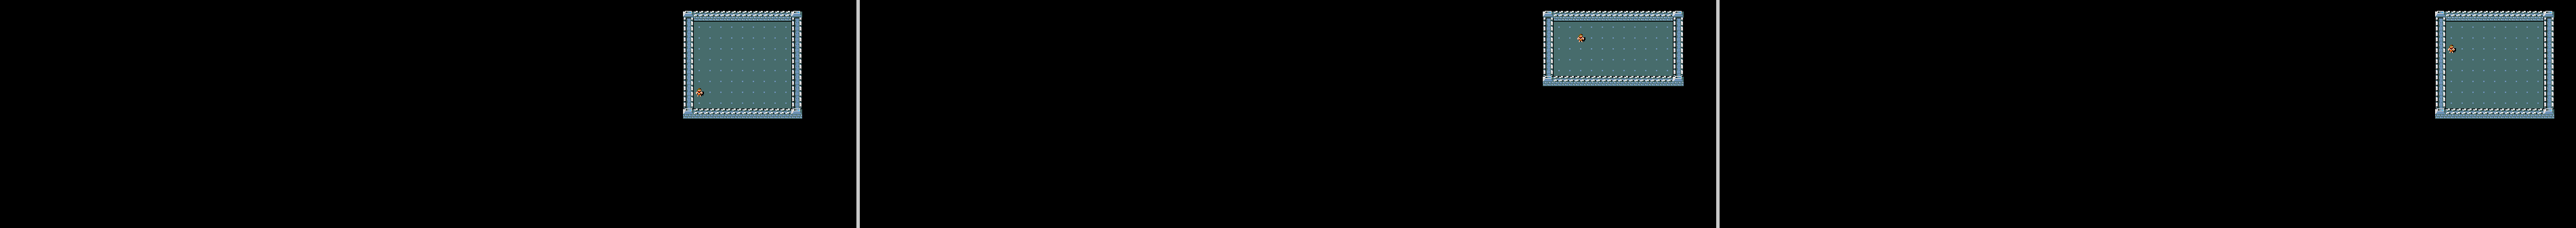

Room placed with position:  5 , 5


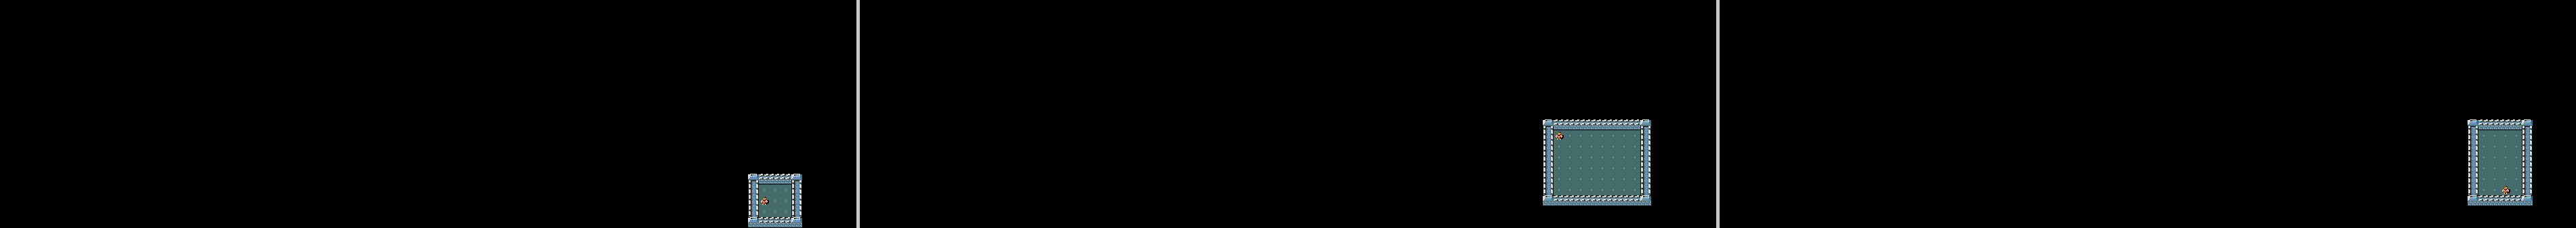

In [7]:
des_file = """
LEVEL: "mylevel"
FLAGS: premapped

ROOM: "ordinary" , lit, (XX,YY), random, random {
}

RANDOM_CORRIDORS
"""
for x,y in [(1,1), (1,5), (5,1), (5,5)]:
    print("Room placed with position: ", x, ",", y)
    render_des_file(des_file.replace("XX", str(x)).replace("YY", str(y)), n_images=3, full_screen=True)

Room placed with align:  left , top


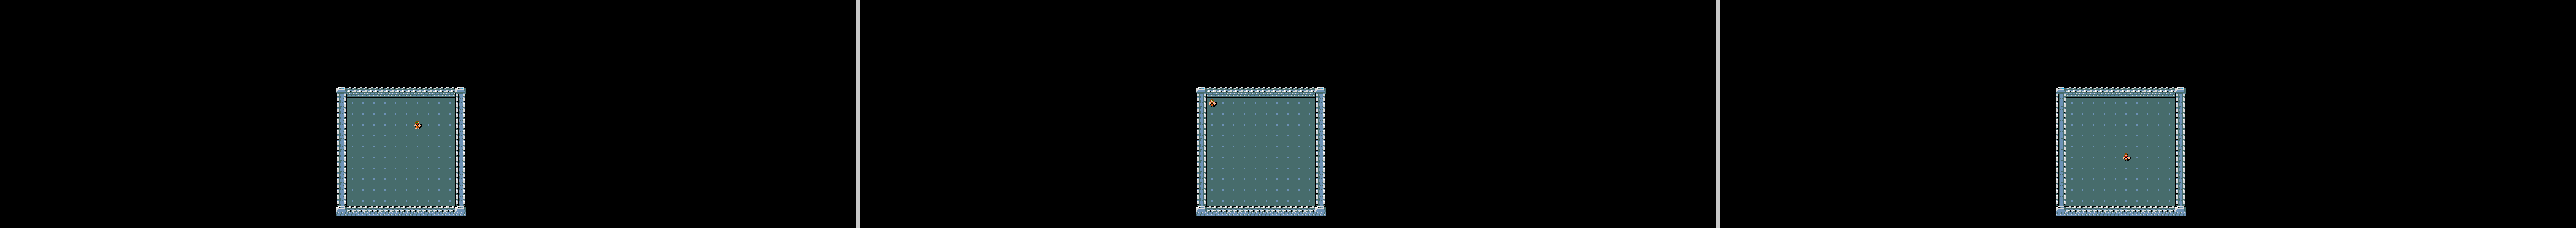

Room placed with align:  right , top


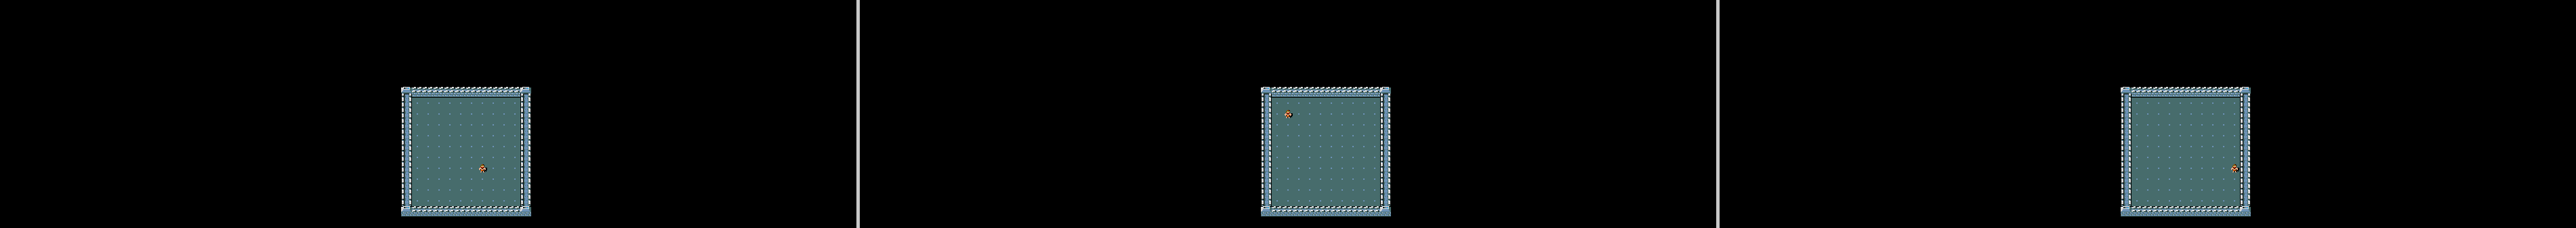

Room placed with align:  right , bottom


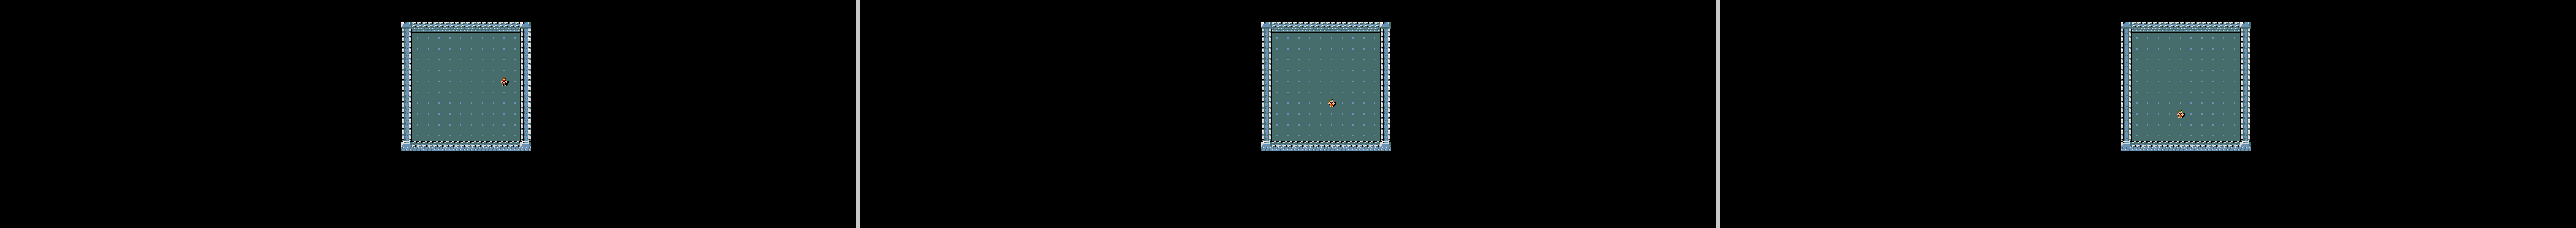

Room placed with align:  center , center


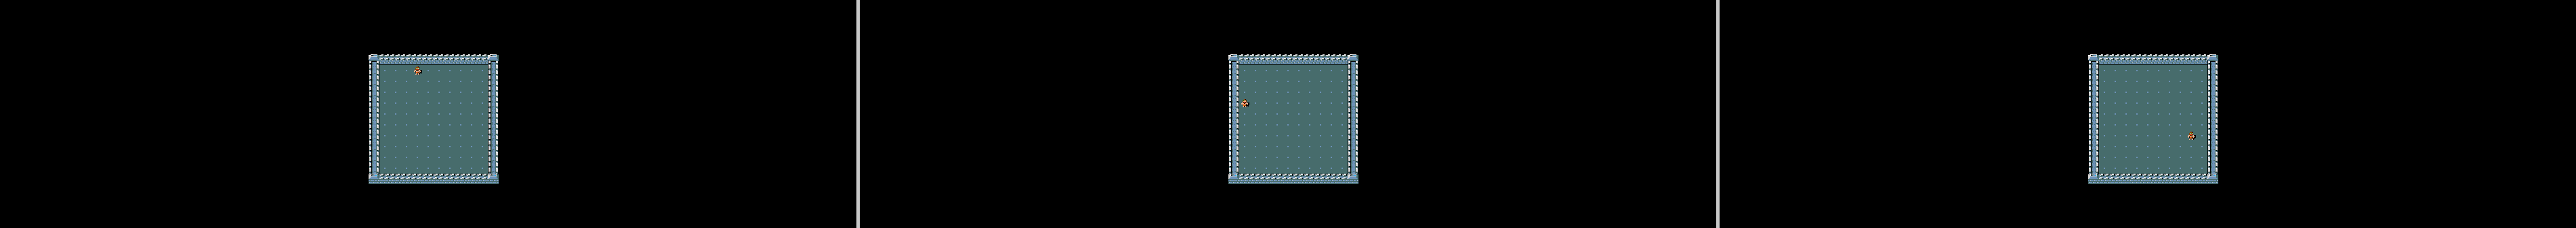

In [8]:
des_file = """
LEVEL: "mylevel"
FLAGS: premapped

ROOM: "ordinary" , lit, (3,3), (xalign,yalign), (10,10) {
}

RANDOM_CORRIDORS
"""
for xalign,yalign in [("left", "top"), ("right", "top"), ("right", "bottom"), ("center", "center")]:
    print("Room placed with align: ", xalign, ",", yalign)
    render_des_file(des_file.replace("xalign", xalign).replace("yalign", yalign), n_images=3, full_screen=True)

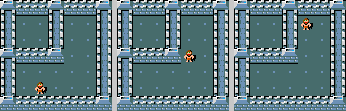

In [9]:
des_file = """
LEVEL: "mylevel"
FLAGS: premapped

ROOM: "ordinary" , lit, (3,3), (center,center), (5,5) {
    SUBROOM: "ordinary", lit, (0,0), (2,2) {
    }
}

RANDOM_CORRIDORS
"""
render_des_file(des_file, n_images=3, full_screen=False)

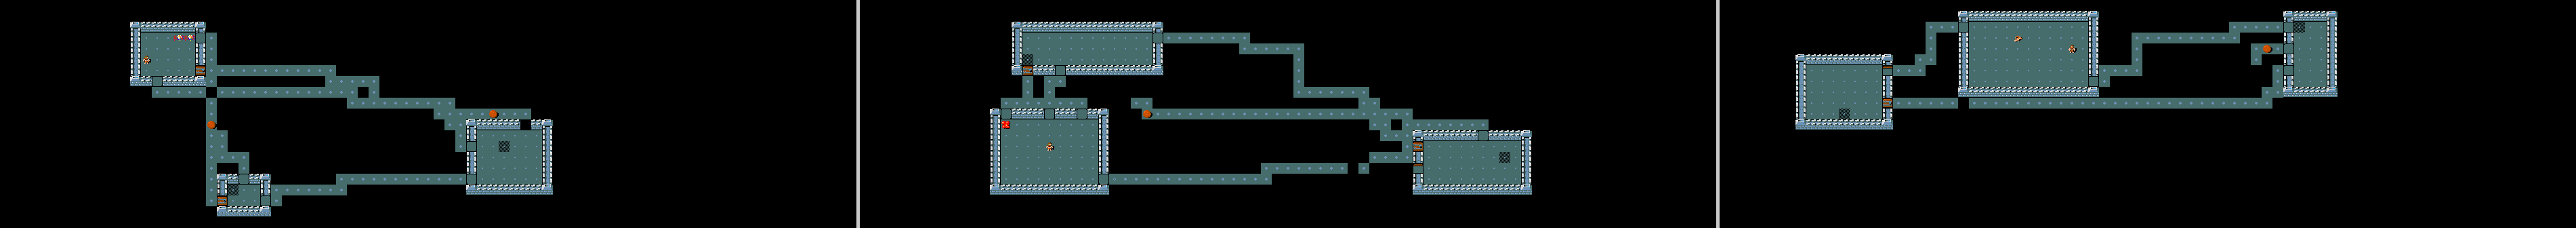

In [10]:
des_file = """
LEVEL: "mylevel"
FLAGS: premapped
REGION: (0,0,20,80), lit, "ordinary"

ROOM: "ordinary" , lit, random, random, random {
    MONSTER: random, random
}
ROOM: "ordinary" , lit, random, random, random {
    MONSTER: ('F', "lichen"), random
}
ROOM: "ordinary" , lit, random, random, random {
    MONSTER: ('F', "red mold"), (0,0)
}

RANDOM_CORRIDORS
"""
render_des_file(des_file, n_images=3, full_screen=True)

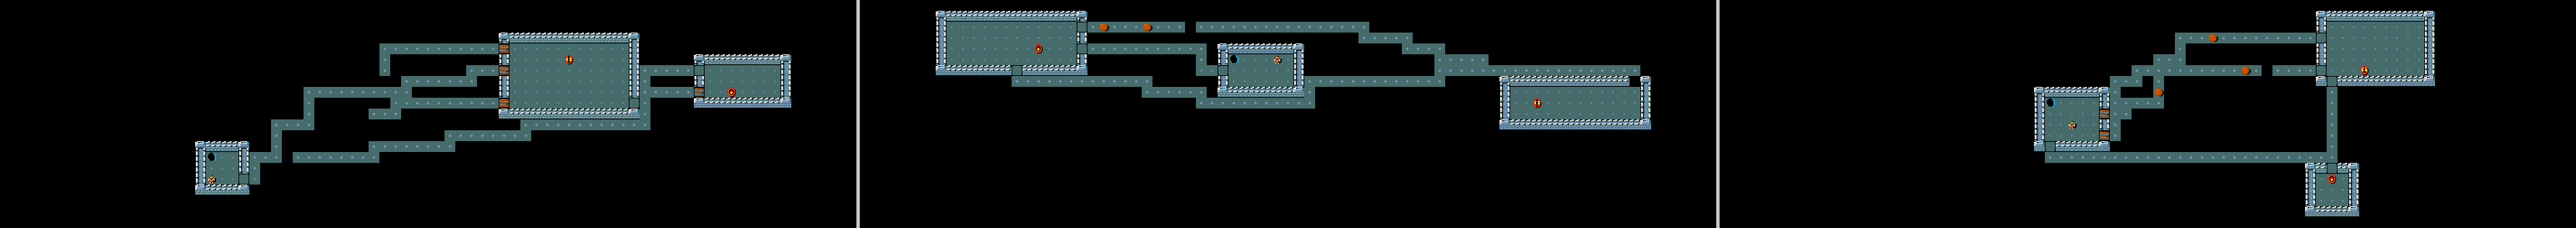

In [11]:
des_file = """
LEVEL: "mylevel"
FLAGS: premapped
REGION: (0,0,20,80), lit, "ordinary"

ROOM: "ordinary" , lit, random, random, random {
    TRAP: random, random
}
ROOM: "ordinary" , lit, random, random, random {
    TRAP:"fire", random
}
ROOM: "ordinary" , lit, random, random, random {
    TRAP:"hole",(0,0)
}

RANDOM_CORRIDORS
"""
render_des_file(des_file, n_images=3, full_screen=True)

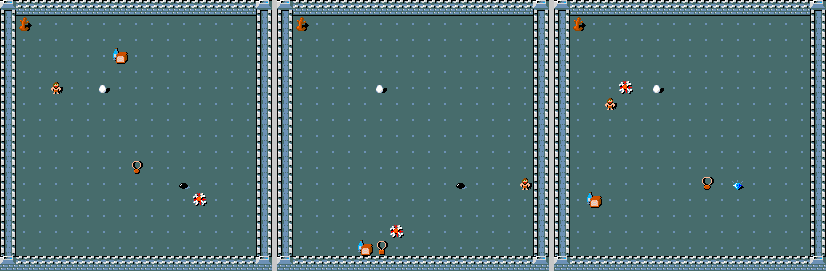

In [12]:
des_file = """
LEVEL: "mylevel"
FLAGS: premapped
REGION: (0,0,20,80), lit, "ordinary"

ROOM: "ordinary", lit, random, (center,center), (15,15) {
    OBJECT:('%', "food ration"), random
    OBJECT:'*', (10,10)
    OBJECT :('"', "amulet of life saving"), random
    OBJECT:('%', "corpse"), random
    OBJECT:('`', "statue"), (0,0), montype:"forest centaur", 1
    OBJECT:('(', "crystal ball"), (17,08), blessed, 5,name:"The Orb of Fate"
    OBJECT:('%',"egg"), (05,04), montype:"yellow dragon"
}

RANDOM_CORRIDORS
"""
render_des_file(des_file, n_images=3)

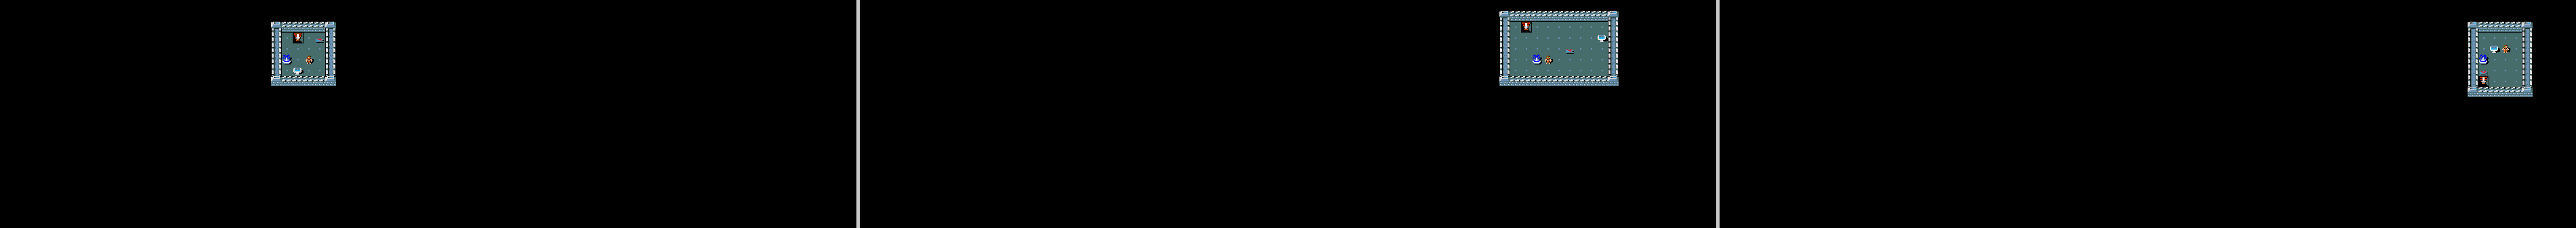

In [13]:
des_file = """
LEVEL: "mylevel"
FLAGS: premapped
REGION: (0,0,20,80), lit, "ordinary"

ROOM: "ordinary" , lit, random, random, random {
    SINK: random
    FOUNTAIN: random
    ALTAR: random, random, random
    STAIR: random, down
}

RANDOM_CORRIDORS
"""
render_des_file(des_file, n_images=3, full_screen=True)

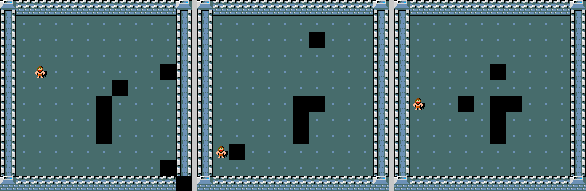

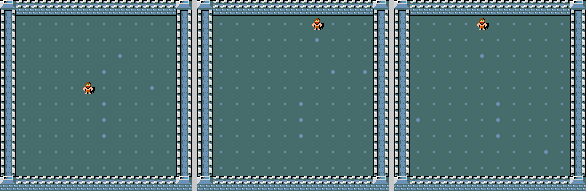

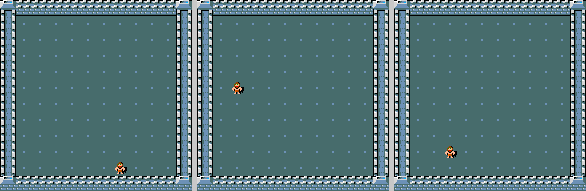

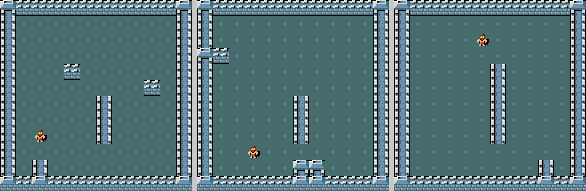

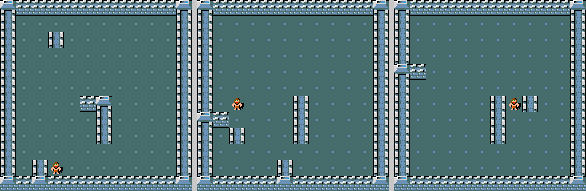

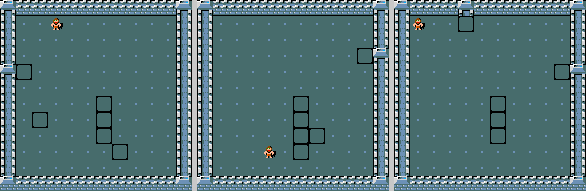

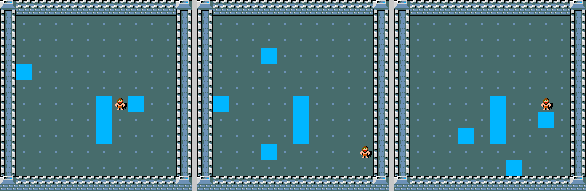

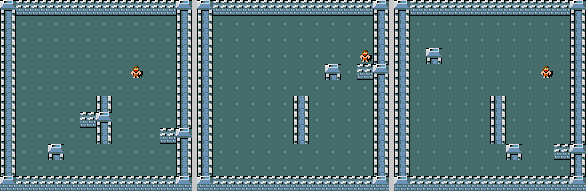

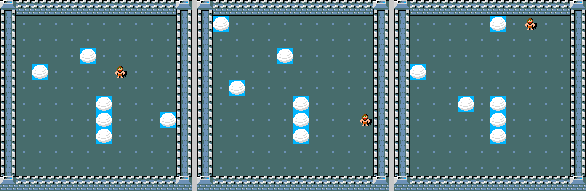

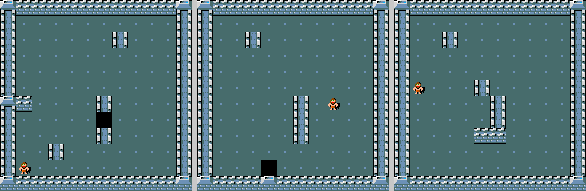

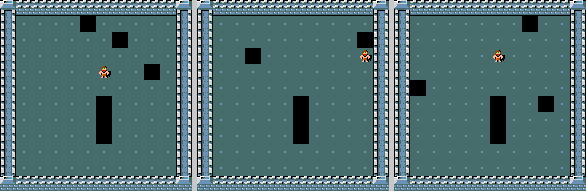

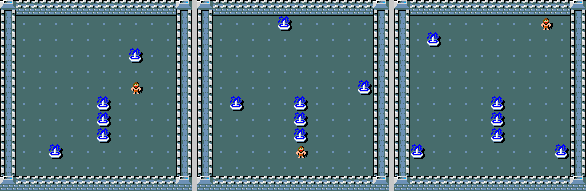

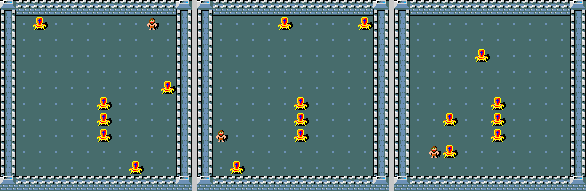

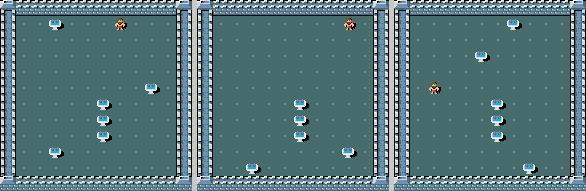

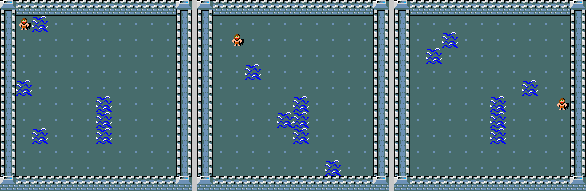

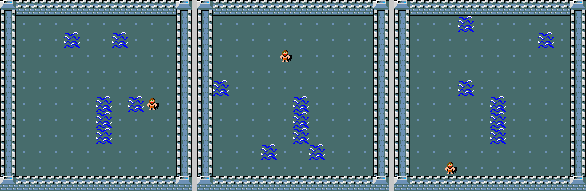

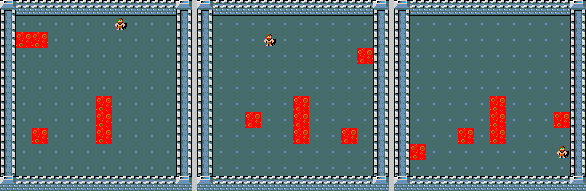

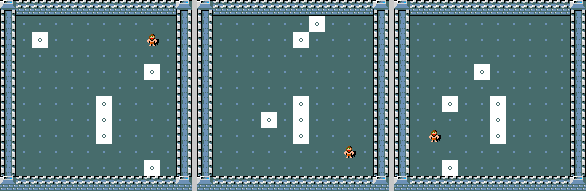

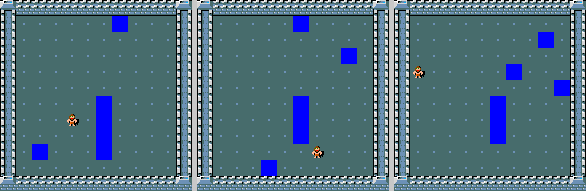

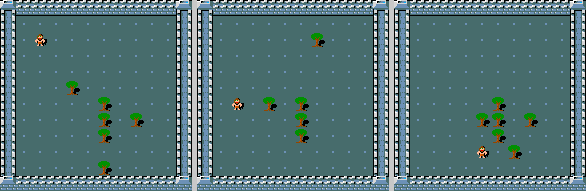

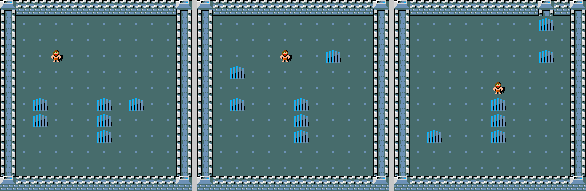

In [14]:
des_file = """
LEVEL: "mylevel"
FLAGS: premapped
REGION: (0,0,20,80), lit, "ordinary"

ROOM: "ordinary" , lit, (3,3), random, (10,10) {
    TERRAIN: (5,5), '%terrain%'
    TERRAIN: (5,6), '%terrain%'
    TERRAIN: (5,7), '%terrain%'
    TERRAIN: random, '%terrain%'
    TERRAIN: random, '%terrain%'
    TERRAIN: random, '%terrain%'
}

RANDOM_CORRIDORS
"""

Terrains = [
    " ",  # solid wall
    "#",  # corridor
    ".",  # room floor (Unlit, unless lit with REGION-command)
    "-",  # horizontal wall
    "|",  # vertical wall
    "+",  # door (State is defined with DOOR -command)
    "A",  # air
    "B",  # crosswall / boundary symbol hack (See REGION)
    "C",  # cloud
    "S",  # secret door
    "H",  # secret corridor
    "{",  # fountain
    "\\", # throne
    "K",  # sink
    "}",  # moat
    "P",  # pool of water
    "L",  # lava pool
    "I",  # ice
    "W",  # water
    "T",  # tree
    "F",  # iron bars
]

for terrain in Terrains:
    render_des_file(des_file.replace("%terrain%", terrain), n_images=3, full_screen=False)

Using fillrect


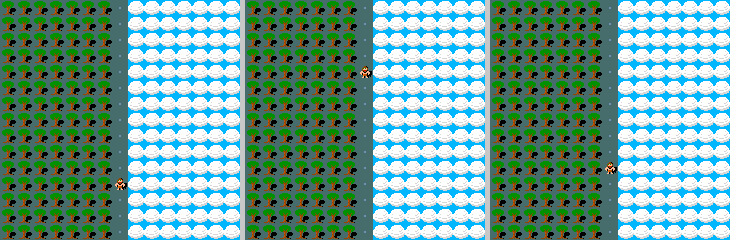

Using rect


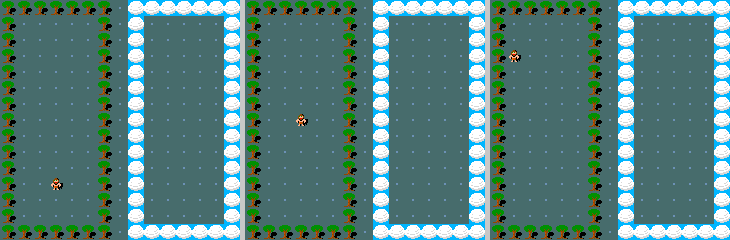

In [15]:
des_file = """
MAZE: "mylevel", ' '
FLAGS:premapped
GEOMETRY:center,center
MAP
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
ENDMAP
REGION: (0,0,20,20), lit, "ordinary"

$left = selection: %rect% (0,0,6,14)
$right = selection: %rect% (8,0,14,14)

TERRAIN: $left, 'T'
TERRAIN: $right, 'C'

"""
for rect in ("fillrect", "rect"):
    print(f"Using {rect}")
    render_des_file(des_file.replace("%rect%", rect), n_images=3)

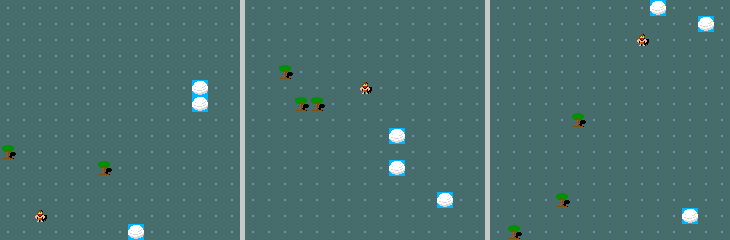

In [16]:
des_file = """
MAZE: "mylevel", ' '
FLAGS:premapped
GEOMETRY:center,center
MAP
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
ENDMAP
REGION: (0,0,20,20), lit, "ordinary"

$left = selection: fillrect (0,0,6,14)
$right = selection: fillrect (8,0,14,14)

TERRAIN: rndcoord($left), 'T'
TERRAIN: rndcoord($left), 'T'
TERRAIN: rndcoord($left), 'T'
TERRAIN: rndcoord($right), 'C'
TERRAIN: rndcoord($right), 'C'
TERRAIN: rndcoord($right), 'C'

"""
render_des_file(des_file.replace("%rect%", rect), n_images=3)

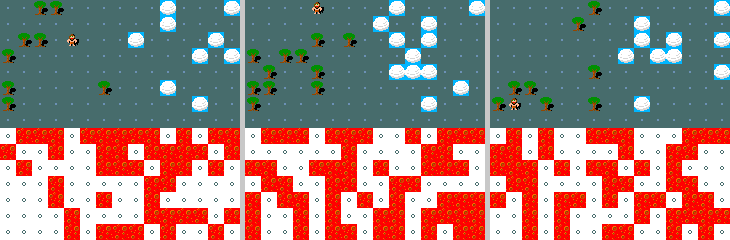

In [17]:

des_file = """
MAZE: "mylevel", ' '
FLAGS:premapped
GEOMETRY:center,center
MAP
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
ENDMAP
REGION: (0,0,20,20), lit, "ordinary"

$top_left_region = (0,0,6,6)
$top_right_region = (8,0,14,6)
$bottom_region = (0,8,14,14)

REPLACE_TERRAIN: $top_left_region, '.', 'T', 20%
REPLACE_TERRAIN: $top_right_region, '.', 'C', 20%

TERRAIN: fillrect $bottom_region, 'L'
REPLACE_TERRAIN: $bottom_region, 'L','I', 50%

"""
render_des_file(des_file, n_images=3)

Using roughness 0


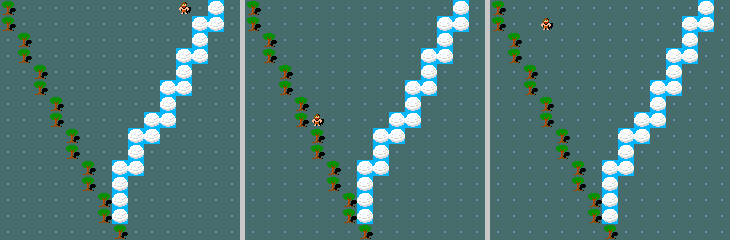

Using roughness 5


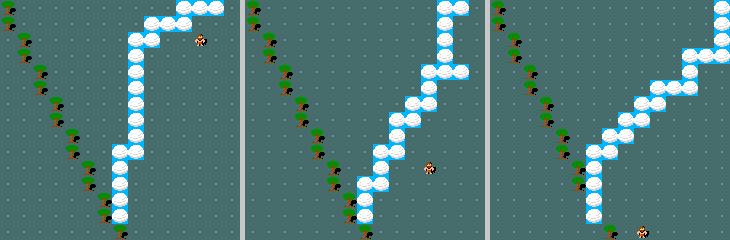

Using roughness 15


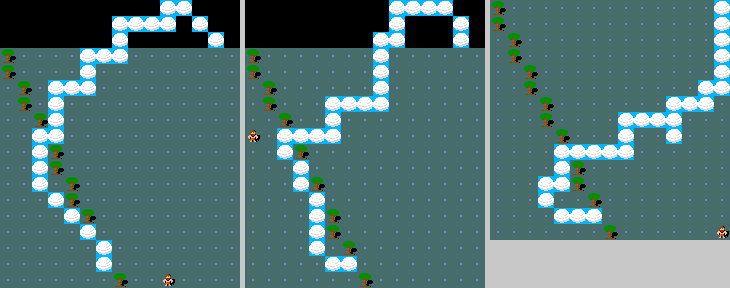

Using roughness 30


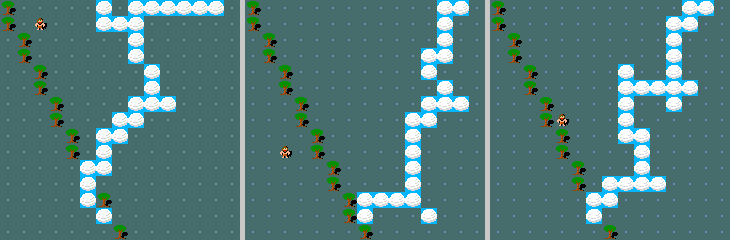

In [18]:
des_file = """
MAZE: "mylevel", ' '
FLAGS:premapped
GEOMETRY:center,center
MAP
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
...............
ENDMAP
REGION: (0,0,20,20), lit, "ordinary"

$top_left = (0,0)
$top_right = (14,0)
$bottom_middle = (7,14)

$tree_line = selection: line $top_left,$bottom_middle
$cloud_line = selection: randline $top_right,$bottom_middle,%roughness%

TERRAIN: $tree_line, 'T'
TERRAIN: $cloud_line, 'C'

"""
for roughness in (0,5,15,30):
    print(f"Using roughness {roughness}")
    render_des_file(des_file.replace("%roughness%", str(roughness)), n_images=3)

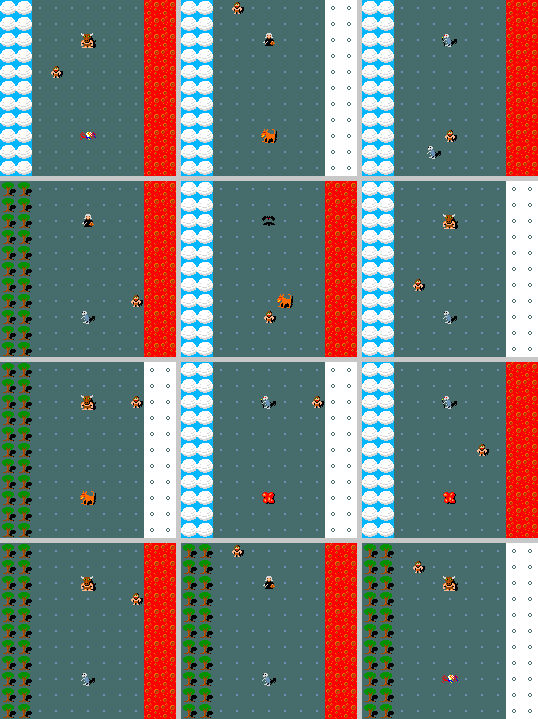

In [19]:
des_file = """
MAZE: "mylevel", ' '
FLAGS:premapped
GEOMETRY:center,center
MAP
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
...........
ENDMAP
REGION: (0,0,20,20), lit, "ordinary"

$left = selection: fillrect (0,0,1,10)
$right = selection: fillrect (9,0,10,10)

IF [50%] {
    TERRAIN: $left, 'T'
} ELSE {
    TERRAIN: $left, 'C'
}

$roll = 2d6
IF [$roll < 7] {
    TERRAIN: $right, 'I'
} ELSE {
    TERRAIN: $right, 'L'
}

$mon_names = monster: { "Archon", "arch-lich", "vampire lord", "minotaur"}
SHUFFLE: $mon_names
MONSTER: $mon_names[0], (5,2), hostile

$mon_names_new = monster: { "Lich", "grid bug", "hell hound", "red mold"}
$mon_index = 1d4
MONSTER: $mon_names_new[$mon_index], (5,8), hostile
"""
render_des_file(des_file, n_images=12)

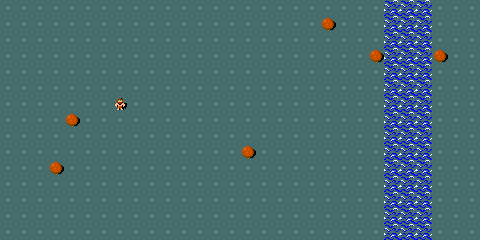

In [3]:
des_file = """
MAZE: "mylevel", ' '
FLAGS:premapped
GEOMETRY:center,center
MAP
..............................
..............................
..............................
..............................
..............................
..............................
..............................
..............................
..............................
..............................
..............................
..............................
..............................
..............................
..............................
ENDMAP
REGION: (0,0,30,30), lit, "ordinary"

$pool_loc = selection: fillrect (24,0,26,14)

TERRAIN: $pool_loc, 'P'

OBJECT: "boulder", random
OBJECT: "boulder", random
OBJECT: "boulder", random
OBJECT: "boulder", random
OBJECT: "boulder", random
OBJECT: "boulder", random

"""
render_des_file(des_file, n_images=1)